# Keras Function API 

- Functional API 로 구성 가능한 다양한 Neural Network Models

**conda install pydot**  
**conda install graphviz**

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed

# Standard Neural Network Models 

## 1. Simple Multi-layer Perceptron

In [2]:
inp = Input(shape=(10,))
x = Dense(10, activation='relu')(inp)
x = Dense(20, activation='relu')(x)
output = Dense(1, activation='softmax')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


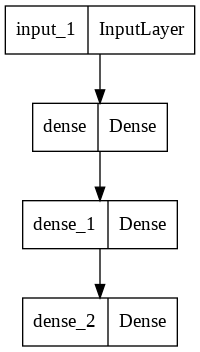

In [3]:
plot_model(model)

## 2. Convolutional Neural Network

In [4]:
inp = Input(shape=(64, 64, 1))
x = Conv2D(32, kernel_size=4, activation='relu')(inp)
x = MaxPooling2D(pool_size=(3, 3))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                128010    
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                           

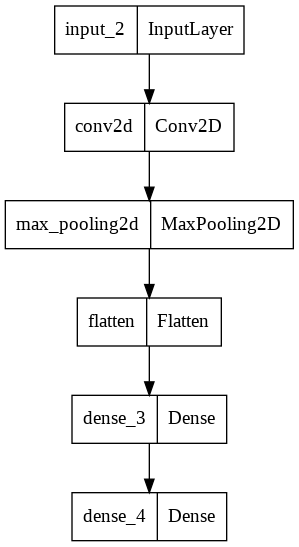

In [5]:
plot_model(model)

## 3. Recurrent Neural Network

In [6]:
inp = Input(shape=(100, 1))
x = LSTM(10)(inp)
x = Dense(10, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


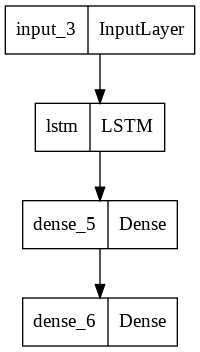

In [7]:
plot_model(model)

# Shared Layers Models

-한 layer 의 output 을 여러 layer 가 share하는 모델

## 1. Shared Input Layer

- 하나의 image input 을 interpret 하는 kernel size 가 다른 여러개의 convolutional layer 구성

In [8]:
inp = Input(shape=(64, 64, 1))

#1st feature extractor
x = Conv2D(32, kernel_size=4, activation='relu')(inp)
x = MaxPooling2D(pool_size=(2, 2))(x)
flat1 = Flatten()(x)

#2nd feature extractor
x = Conv2D(16, kernel_size=8, activation='relu')(inp)
x = MaxPooling2D(pool_size=(2, 2))(x)
flat2 = Flatten()(x)

# merge feature extractor
merge = concatenate([flat1, flat2])
#interpretation layer
x = Dense(10, activation='relu')(merge)
#prediction output
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 61, 61, 32)   544         ['input_4[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 57, 57, 16)   1040        ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 32)  0           ['conv2d_1[0][0]']               
                                                                                            

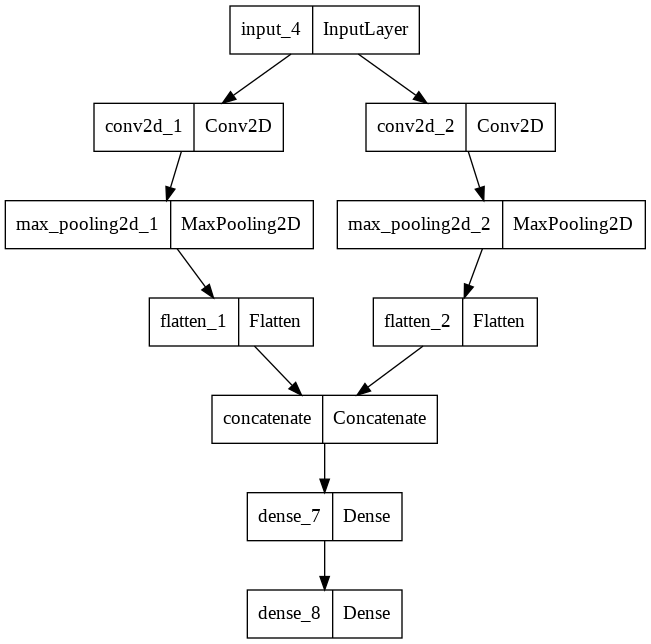

In [9]:
plot_model(model)

## 2. Shared Feature Extraction Layer

- sequence classificaion 의 feature extractor 인 LSTM 의 output 을 interpret 하는 두개의 병렬 submodels  

- timestep 100, 1 feature input

In [10]:
inp = Input(shape=(100, 1))
#feature extractor
extract1 = LSTM(10)(inp)

#1st interpretation
interp1 = Dense(10, activation='relu')(extract1)

#2nd interpretation
x = Dense(10, activation='relu')(extract1)
x= Dense(20, activation='relu')(x)
interp2 = Dense(10, activation='relu')(x)

# merge interpretation
merge = concatenate([interp1, interp2])
# output
output = Dense(1, activation='sigmoid')(merge)

model = Model(inputs=inp, outputs=output)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 10)           480         ['input_5[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 10)           110         ['lstm_1[0][0]']                 
                                                                                                  
 dense_11 (Dense)               (None, 20)           220         ['dense_10[0][0]']               
                                                                                            

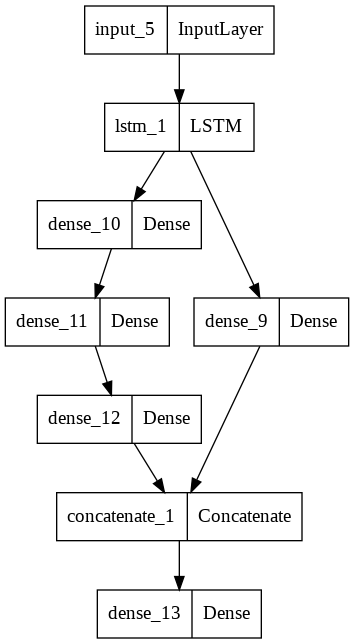

In [11]:
plot_model(model)

# Multiple Input and Output Models

## 1. Multiple Input Model

- 다른 크기의 두가지 version 의 image 를 input 으로 받아서 image 분류를 하는 model (64x64 흑백, 32x32 컬러) 
- 각 이미지에 대해 서로 다른 CNN model 이 feature extraction 을 하고, 두 module 의 결과가 concatenate 된다.

In [12]:
#1st input model
inp1 = Input(shape=(64, 64, 1))
x = Conv2D(32, kernel_size=4, activation='relu')(inp1)
x = MaxPooling2D(pool_size=(3, 3))(x)
flat1 = Flatten()(x)

#2nd input model
inp2 = Input(shape=(32, 32, 3))
x = Conv2D(32, kernel_size=4, activation='relu')(inp2)
x = MaxPooling2D(pool_size=(3, 3))(x)
flat2 = Flatten()(x)

#merge input models
merge = concatenate([flat1, flat2])
#interpretation model
x = Dense(10, activation='relu')(merge)
output = Dense(1, activation='relu')(x)

model = Model([inp1, inp2], output)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 61, 61, 32)   544         ['input_6[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 29, 29, 32)   1568        ['input_7[0][0]']                
                                                                                            

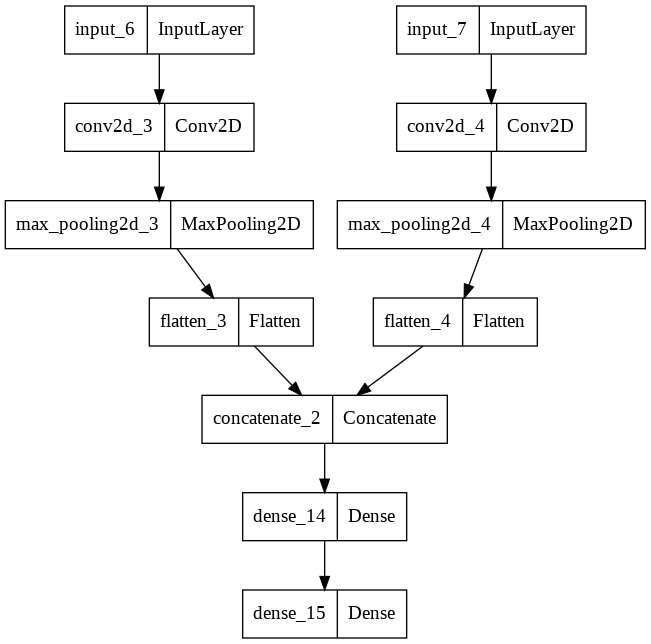

In [13]:
plot_model(model)

## 2. Multiple Output Model

- 2개의 서로 다른 type 의 prediction 을 출력하는 model  
- 100 timestep 1 feature 의 경우 가정  
- 이 model 은 sequence 를 분류하면서 동시에 같은 길이의 새로운 sequence 를 출력한다.  
- LSTM layer 가 input sequence 를 interpret 하고 각 timestep 별로 hidden state 반환  
- 첫번째 output model 은 stacked LSTM 으로 feature 를 interpret 하고 binary prediction 수행  
- 두번째 output model 은 같은 output layer 를 이용하여 각 timestep 에 대해 real value prediction

In [14]:
inp = Input(shape=(100, 1))
# feature extraction
extract = LSTM(10, return_sequences=True)(inp)
# classification output
x = LSTM(10)(extract)
x = Dense(10, activation='relu')(x)
output1 = Dense(1, activation='sigmoid')(x)

# sequence output
output2 = TimeDistributed(Dense(1, activation='relu'))(extract)

model = Model(inputs=inp, outputs=[output1, output2])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 100, 10)      480         ['input_8[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 10)           840         ['lstm_2[0][0]']                 
                                                                                                  
 dense_16 (Dense)               (None, 10)           110         ['lstm_3[0][0]']                 
                                                                                            

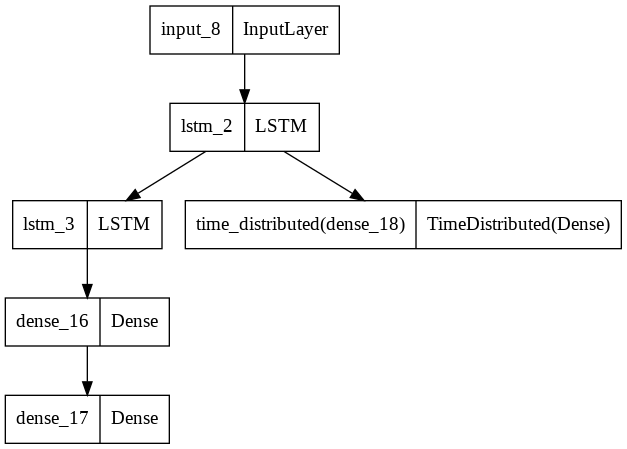

In [15]:
plot_model(model)